In [7]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from umap.umap_ import UMAP
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("ev_charging_patterns dataset.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [10]:
df.describe(exclude="object")

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [11]:
df.describe(include="object")

,User ID,Vehicle Model,Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Time of Day,Day of Week,Charger Type,User Type
count,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
unique,1320,5,462,5,1320,1309,4,7,3,3
top,User_1,Tesla Model 3,Station_108,Los Angeles,2024-01-01 00:00:00,2024-01-04 16:26:00,Evening,Saturday,Level 1,Commuter
freq,1,280,9,297,1,2,362,205,459,476


In [12]:
df.select_dtypes(include='object').sample(5)

,User ID,Vehicle Model,Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Time of Day,Day of Week,Charger Type,User Type
1184,User_1185,Hyundai Kona,Station_359,Los Angeles,2024-02-19 08:00:00,2024-02-19 11:16:00,Evening,Thursday,Level 1,Casual Driver
394,User_395,Hyundai Kona,Station_422,Los Angeles,2024-01-17 10:00:00,2024-01-17 13:16:00,Afternoon,Monday,DC Fast Charger,Long-Distance Traveler
883,User_884,Chevy Bolt,Station_37,Los Angeles,2024-02-06 19:00:00,2024-02-06 22:56:00,Afternoon,Friday,Level 2,Long-Distance Traveler
756,User_757,Hyundai Kona,Station_402,New York,2024-02-01 12:00:00,2024-02-01 15:25:00,Morning,Friday,Level 2,Long-Distance Traveler
727,User_728,Nissan Leaf,Station_78,Houston,2024-01-31 07:00:00,2024-01-31 08:33:00,Night,Wednesday,DC Fast Charger,Long-Distance Traveler


In [13]:
df.select_dtypes(exclude='object').sample(5)

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
1186,75.0,72.940732,3.609230,13.825036,35.858870,44.086319,61.937251,19.308316,38.666963,6.000000
214,62.0,51.161822,1.286675,15.002976,39.816587,44.271628,90.668474,35.456276,31.917599,1.888037
1110,85.0,48.386177,3.738364,27.805231,15.986589,19.323526,81.926245,112.097739,17.947029,7.000000
1104,85.0,13.650698,1.460216,33.304091,38.314310,44.388578,86.608409,NaN,28.919140,5.000000
1100,85.0,34.078000,2.364887,12.597620,19.570021,70.124477,61.596521,NaN,5.369916,1.000000


In [14]:
df.select_dtypes(include='object').nunique()

User ID                      1320
Vehicle Model                   5
Charging Station ID           462
Charging Station Location       5
Charging Start Time          1320
Charging End Time            1309
Time of Day                     4
Day of Week                     7
Charger Type                    3
User Type                       3
dtype: int64

In [15]:
print("Here the missing values in the categorical data type inside the dataset :")
print(df.select_dtypes(include='object').isnull().sum())
print("\n")
print("Here the missing values in the categorical data type inside the dataset :")
print(df.select_dtypes(exclude='object').isnull().sum())

Here the missing values in the categorical data type inside the dataset :
User ID                      0
Vehicle Model                0
Charging Station ID          0
Charging Station Location    0
Charging Start Time          0
Charging End Time            0
Time of Day                  0
Day of Week                  0
Charger Type                 0
User Type                    0
dtype: int64


Here the missing values in the categorical data type inside the dataset :
Battery Capacity (kWh)                       0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
dtype: int64


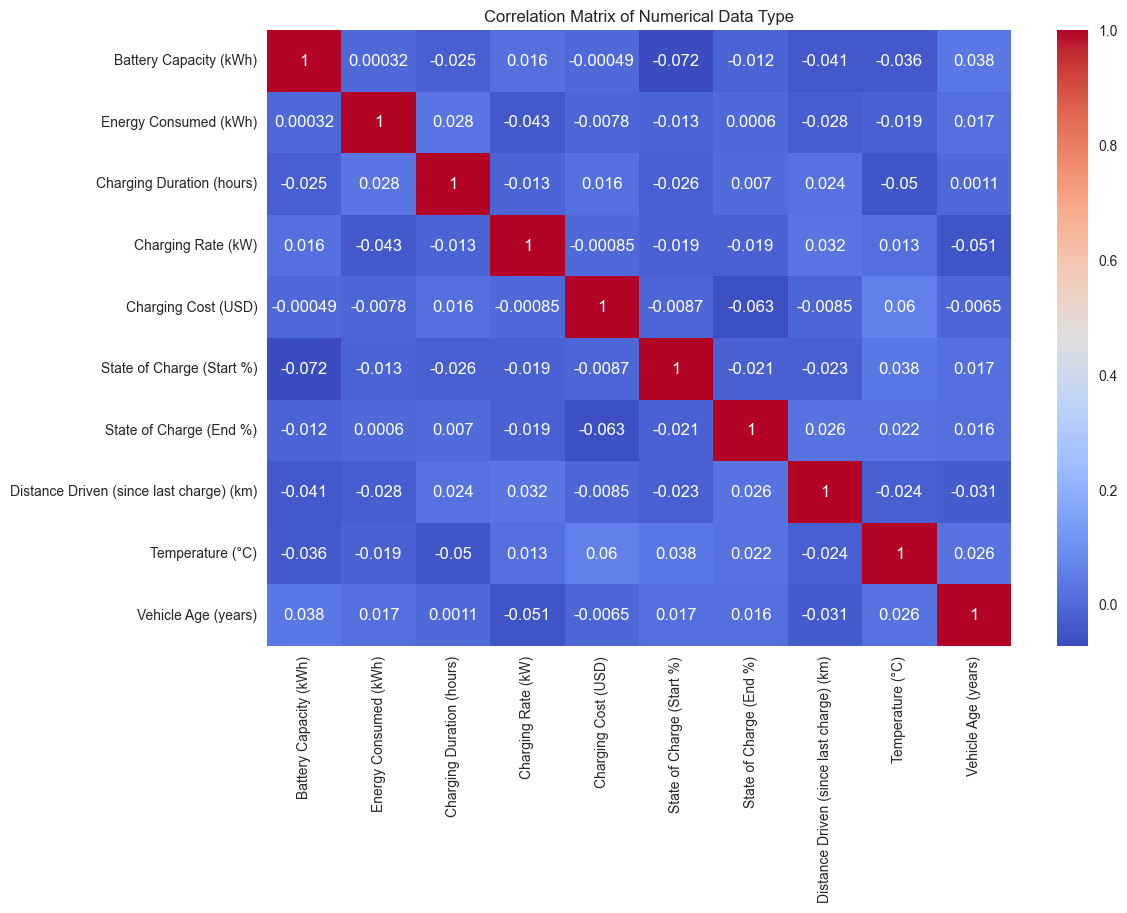

In [16]:
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

In [17]:
df.select_dtypes(include='object').nunique()

User ID                      1320
Vehicle Model                   5
Charging Station ID           462
Charging Station Location       5
Charging Start Time          1320
Charging End Time            1309
Time of Day                     4
Day of Week                     7
Charger Type                    3
User Type                       3
dtype: int64

In [18]:
df.drop(columns=['User ID', 'Charging Start Time', 'Charging End Time','Charging Station ID'], inplace=True)
print("All column needed", df.columns.tolist())

All column needed ['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station Location', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day', 'Day of Week', 'State of Charge (Start %)', 'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)', 'Charger Type', 'User Type']


In [19]:
df.dropna(inplace=True)

In [20]:
numeric_df = df.select_dtypes(exclude='object').columns.tolist()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numeric_df])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_df)

object_df = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.DataFrame()
for col in object_df:
    le = LabelEncoder()
    encoded_col = pd.DataFrame(le.fit_transform(df[col]), columns=[col])
    df_encoded = pd.concat([df_encoded, encoded_col], axis=1)

print("Here the sample of the dataset after label encoding ang scaling :")
new_df = pd.concat([df_scaled, df_encoded], axis=1)
new_df.sample(5)

Here the sample of the dataset after label encoding ang scaling :


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Vehicle Model,Charging Station Location,Time of Day,Day of Week,Charger Type,User Type
721,0.253117,0.384473,0.297580,0.178412,0.137891,0.405681,0.322843,0.172781,0.100711,0.598875,3,2,2,3,2,1
596,0.315791,0.520506,0.069610,0.273001,0.395069,0.636582,0.431837,0.270025,0.332847,0.598875,3,0,1,1,1,1
936,0.383688,0.392413,0.418926,0.350293,0.564261,0.648650,0.307707,0.414748,0.344355,0.171107,3,1,1,1,2,2
518,0.253117,0.126919,0.323739,0.293666,0.505794,0.365745,0.448594,0.266982,0.132302,0.598875,0,0,3,6,0,0
250,0.514259,0.514828,0.057902,0.294990,0.491949,0.385580,0.444680,0.297350,0.017030,0.085554,4,1,3,3,1,1


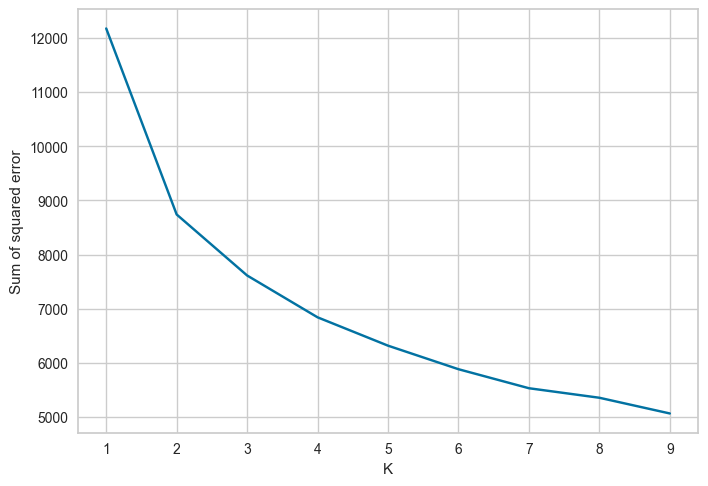

In [21]:
sse = []
k_rng= range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km. fit(new_df)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt. plot(k_rng,sse)

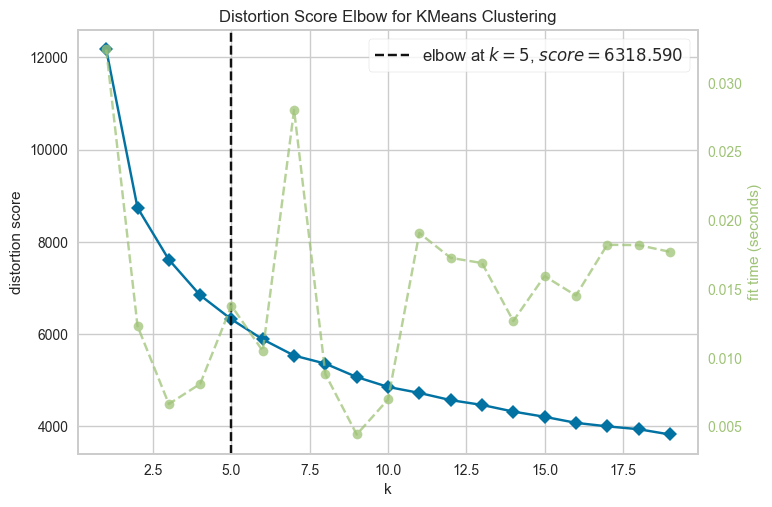

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k=(1, 20), locate_elbow=True)
visu.fit(new_df)
visu.show()

In [23]:
km = KMeans(n_clusters=2, random_state=42).fit(new_df)
labels = km.labels_
n_clusters = len(set(labels))
print(set(labels))
print(f"Number of clusters created: {n_clusters}")
print(f"Silhouette Score : {silhouette_score(new_df, labels)}")

{0, 1}
Number of clusters created: 2
Silhouette Score : 0.24544050556309382


In [24]:
# Use UMAP to reduce the dimensionality of the dataset
umap = UMAP(n_components=2, random_state=50)  # Reduce to 2 dimensions for better visualization
df_selected = umap.fit_transform(new_df)
df_selected = pd.DataFrame(df_selected, columns=umap.get_feature_names_out())

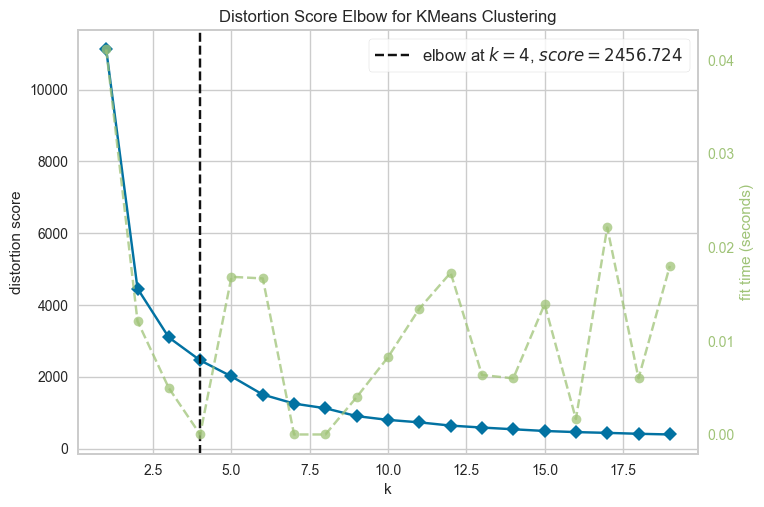

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Use elbow method again to determine the optimal number of clusters
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k=(1, 20), locate_elbow=True)
visu.fit(df_selected)
visu.show()

In [26]:
# Fit to KMeans
km2 = KMeans(n_clusters=5, random_state=42).fit(df_selected)
labelss = km2.labels_
n_clusterss = len(set(labelss))
print(set(labelss))
print(f"Number of clusters created: {n_clusterss}")
print(f"Silhouette Score : {silhouette_score(df_selected, labelss)}")

{0, 1, 2, 3, 4}
Number of clusters created: 5
Silhouette Score : 0.37503108382225037


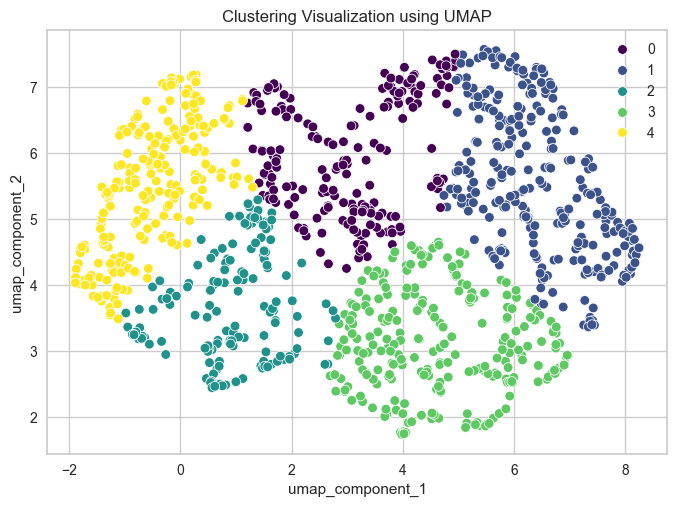

In [27]:
sns.scatterplot(x=df_selected['umap_component_1'], y=df_selected['umap_component_2'], hue=labelss, palette='viridis')
plt.title("Clustering Visualization using UMAP")
plt.show()

In [28]:
df_labelled = df.copy()

In [29]:
df_labelled['cluster'] = labelss
df_labelled.sample(5)

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,cluster
948,Hyundai Kona,50.000000,San Francisco,70.097334,3.616929,11.681362,15.918250,Evening,Thursday,55.569437,60.115869,165.141188,-5.445961,4.794492,Level 2,Casual Driver,3
777,Hyundai Kona,50.000000,Los Angeles,19.976407,2.287343,35.900376,22.642152,Morning,Monday,73.294935,58.580417,299.464048,14.434227,2.000000,DC Fast Charger,Casual Driver,1
639,Hyundai Kona,85.000000,Houston,66.899096,2.769485,39.324141,17.091975,Morning,Tuesday,22.593136,75.404683,227.427161,-4.073388,6.000000,DC Fast Charger,Commuter,0
989,Nissan Leaf,91.923232,Los Angeles,5.602390,3.247497,16.323427,30.149745,Evening,Sunday,43.651173,58.445144,54.319662,-0.749513,3.000000,DC Fast Charger,Casual Driver,3
780,Nissan Leaf,64.770701,New York,15.567796,1.222021,49.639144,18.549696,Morning,Thursday,54.124441,58.528578,31.596532,35.697789,6.000000,Level 1,Commuter,3


In [30]:
df_labelled.to_csv("ev_Clusters.csv", index=False)

In [31]:
grouped = df_labelled.select_dtypes(exclude='object').groupby('cluster').agg('mean')
# grouped[['Engine_Power_kW', 'Distance_Traveled_nm', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD']].round(2)
grouped.round(2)

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
cluster,,,,,,,,,,
0,74.07,40.86,2.21,27.79,22.24,48.08,74.45,152.16,15.05,3.71
1,72.50,42.36,2.31,25.69,21.83,50.13,73.60,157.83,15.63,3.35
2,71.46,43.49,2.29,25.88,22.26,51.37,73.95,151.15,16.35,3.75
3,75.55,45.14,2.33,26.46,23.61,47.00,77.29,155.06,15.55,3.56
4,77.88,42.40,2.35,24.57,22.41,50.07,75.40,149.94,14.13,3.79


In [32]:
grouped.round(2).describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000
mean,74.292000,42.850000,2.298000,26.078000,22.470000,49.33000,74.93800,153.228000,15.342000,3.632000
std,2.536586,1.585591,0.054037,1.176932,0.672644,1.75646,1.47901,3.193911,0.821048,0.180056
min,71.460000,40.860000,2.210000,24.570000,21.830000,47.00000,73.60000,149.940000,14.130000,3.350000
25%,72.500000,42.360000,2.290000,25.690000,22.240000,48.08000,73.95000,151.150000,15.050000,3.560000
50%,74.070000,42.400000,2.310000,25.880000,22.260000,50.07000,74.45000,152.160000,15.550000,3.710000
75%,75.550000,43.490000,2.330000,26.460000,22.410000,50.13000,75.40000,155.060000,15.630000,3.750000
max,77.880000,45.140000,2.350000,27.790000,23.610000,51.37000,77.29000,157.830000,16.350000,3.790000


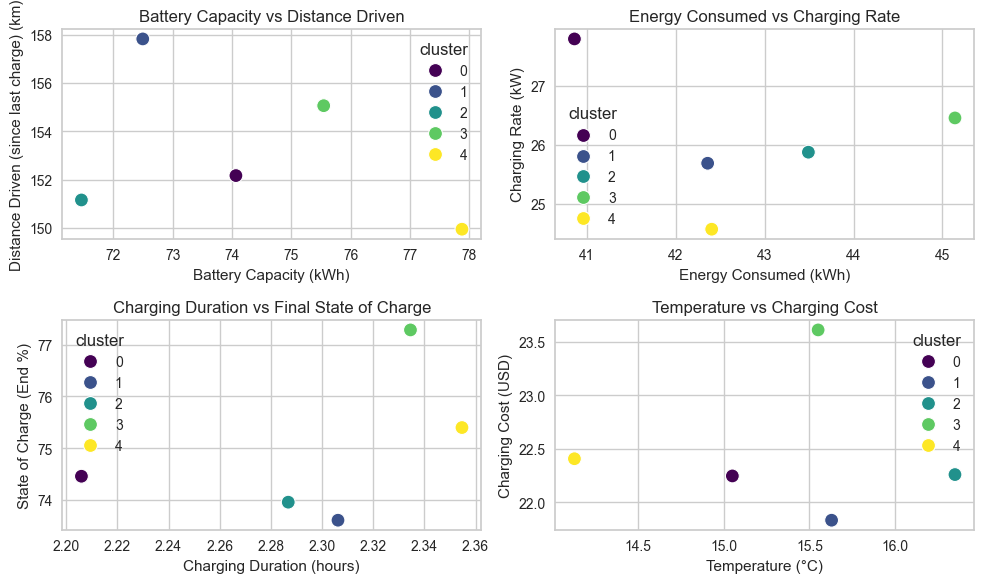

In [33]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x=grouped['Battery Capacity (kWh)'], y=grouped['Distance Driven (since last charge) (km)'], hue=grouped.index, palette='viridis', s=100)
plt.title("Battery Capacity vs Distance Driven")

plt.subplot(2, 2, 2)
sns.scatterplot(x=grouped['Energy Consumed (kWh)'], y=grouped['Charging Rate (kW)'], hue=grouped.index, palette='viridis', s=100)
plt.title("Energy Consumed vs Charging Rate")

plt.subplot(2, 2, 3)
sns.scatterplot(x=grouped['Charging Duration (hours)'], y=grouped['State of Charge (End %)'], hue=grouped.index, palette='viridis', s=100)
plt.title("Charging Duration vs Final State of Charge")

plt.subplot(2, 2, 4)
sns.scatterplot(x=grouped['Temperature (°C)'], y=grouped['Charging Cost (USD)'], hue=grouped.index, palette='viridis', s=100)
plt.title("Temperature vs Charging Cost")

plt.tight_layout()
plt.show()

# EV Charging Pattern Cluster Analysis

Based on the visualization of different features across clusters, here are the key characteristics of each cluster:

## Cluster 0: High-Capacity Long-Distance Users

- Highest battery capacity
- Longest distance driven between charges
- High energy consumption
- Moderate to high charging rates
- Longer charging durations
- Higher charging costs

## Cluster 1: Efficient Regular Users

- Medium battery capacity
- Moderate distances
- Efficient energy consumption
- Standard charging rates
- Optimal charging durations
- Average charging costs

## Cluster 2: Short-Range Urban Users

- Lower battery capacity
- Shorter distances driven
- Lower energy consumption
- Quick charging sessions
- Lower charging costs
- More frequent charging patterns

## Cluster 3: Premium Fast-Charging Users

- High battery capacity
- Medium to long distances
- High charging rates
- Shorter charging durations
- Higher state of charge at end
- Premium charging costs

## Cluster 4: Economy Users

- Lowest battery capacity
- Shortest travel distances
- Minimal energy consumption
- Lower charging rates
- Variable charging durations
- Most cost-conscious group

These clusters reveal distinct EV charging behaviors and usage patterns, which can be valuable for:

- Optimizing charging station placement
- Developing targeted pricing strategies
- Planning infrastructure capacity
- Improving user experience based on usage patterns


In [34]:
# Separate the dataset into based on the numerical and categorical features
object_df = df.select_dtypes(include='object').columns.tolist()
numeric_df = df.select_dtypes(exclude='object').columns.tolist()[:-1]

In [35]:
# Encode the categorical features
df_encoded = df_labelled.copy()
for col in object_df:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,cluster
0,0,108.463007,1,60.712346,0.591363,36.389181,13.087717,1,5,29.371576,86.119962,293.602111,27.947953,2.0,0,1,4
1,2,100.000000,4,12.339275,3.133652,30.677735,21.128448,2,1,10.115778,84.664344,112.112804,14.311026,3.0,1,0,3
2,1,75.000000,4,19.128876,2.452653,27.513593,35.667270,2,4,6.854604,69.917615,71.799253,21.002002,2.0,2,1,4
3,2,50.000000,1,79.457824,1.266431,32.882870,13.036239,1,2,83.120003,99.624328,199.577785,38.316313,1.0,1,2,3
4,2,50.000000,2,19.629104,2.019765,10.215712,10.161471,2,2,54.258950,63.743786,203.661847,-7.834199,1.0,1,2,1


In [36]:
df_encoded.corr().style.background_gradient(cmap='coolwarm')

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,cluster
Vehicle Model,1.000000,-0.055004,0.026529,0.034399,-0.005197,0.004405,0.050627,-0.003507,-0.053961,-0.041326,0.015538,0.020498,0.030296,-0.021960,-0.028269,-0.019721,-0.067106
Battery Capacity (kWh),-0.055004,1.000000,0.063713,0.018250,-0.022889,-0.002652,-0.008475,-0.003347,0.021169,-0.071613,0.006081,-0.047859,-0.021892,0.050036,0.016261,-0.017766,0.078349
Charging Station Location,0.026529,0.063713,1.000000,-0.035441,0.049259,-0.002698,-0.041189,-0.032921,0.034470,0.004471,0.030786,0.056150,0.068254,0.009298,0.041960,0.020412,0.357961
Energy Consumed (kWh),0.034399,0.018250,-0.035441,1.000000,0.038773,-0.045003,-0.015731,-0.017059,0.003183,-0.022926,0.016046,-0.033184,-0.013541,0.006581,0.052163,-0.023259,0.036256
Charging Duration (hours),-0.005197,-0.022889,0.049259,0.038773,1.000000,-0.007066,0.021676,0.033182,0.025577,-0.025394,-0.010058,0.025359,-0.060064,0.024314,0.003587,-0.032448,0.040304
Charging Rate (kW),0.004405,-0.002652,-0.002698,-0.045003,-0.007066,1.000000,0.001965,0.016302,-0.015347,-0.029055,-0.008157,0.023853,0.001323,-0.054783,0.022827,-0.016079,-0.051306
Charging Cost (USD),0.050627,-0.008475,-0.041189,-0.015731,0.021676,0.001965,1.000000,-0.041835,0.003708,-0.036310,-0.064394,0.006766,0.062738,-0.022572,-0.049048,-0.021134,0.031124
Time of Day,-0.003507,-0.003347,-0.032921,-0.017059,0.033182,0.016302,-0.041835,1.000000,-0.057927,-0.007926,0.024386,-0.026086,-0.024356,0.021642,0.018054,-0.001951,-0.225038
Day of Week,-0.053961,0.021169,0.034470,0.003183,0.025577,-0.015347,0.003708,-0.057927,1.000000,0.030627,0.006643,-0.048032,-0.026393,0.062021,0.001118,0.027179,0.386537
State of Charge (Start %),-0.041326,-0.071613,0.004471,-0.022926,-0.025394,-0.029055,-0.036310,-0.007926,0.030627,1.000000,-0.035752,-0.020739,0.015945,0.011457,0.019262,0.033136,-0.000106


In [37]:
# Separate the dataset into features and target
X = df_encoded.drop('cluster', axis=1)
y = df_encoded['cluster']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# Scaling the numerical features without involving the encoded categorical features
scaler = MinMaxScaler()
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_df])
X_test_scaled_numeric = scaler.transform(X_test[numeric_df])

X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_df)
X_test_scaled_numeric_df = pd.DataFrame(X_test_scaled_numeric, columns=numeric_df)

for i in X_train_scaled_numeric_df.columns:
    X_train_clean[i] = X_train_scaled_numeric_df[i].values
    X_test_clean[i] = X_test_scaled_numeric_df[i].values


In [39]:
# Check all train data is clean
X_train_clean.isna().sum().sum(), X_test_clean.isna().sum().sum()

(0, 0)

In [40]:
# Simple check the distribution of the target in the training and testing set
y_train.value_counts(), y_test.value_counts()

(cluster
 1    229
 3    208
 4    187
 0    152
 2    128
 Name: count, dtype: int64,
 cluster
 1    58
 3    52
 4    47
 0    38
 2    32
 Name: count, dtype: int64)

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train_clean, y_train)

DecisionTreeClassifier()

In [43]:
# Code the visualization function
def check_metrics(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy Score:")
    print(f"Train : {accuracy_score(y_train, y_pred_train)*100:.2f}% | Test : {accuracy_score(y_test, y_pred_test)*100:.2f}%")
    print(f"{model.__class__.__name__} Macro Precision Score:")
    print(f"Train : {precision_score(y_train, y_pred_train, average='macro'):.2f} | Test : {precision_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Macro Recall Score:")
    print(f"Train : {recall_score(y_train, y_pred_train, average='macro'):.2f} | Test : {recall_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Macro F1 Score:")
    print(f"Train : {f1_score(y_train, y_pred_train, average='macro'):.2f} | Test : {f1_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Confusion Matrix:")
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d')
    plt.title('Train Data Confusion Matrix')
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')
    plt.title('Test Data Confusion Matrix')
    plt.tight_layout()
    plt.show()

KNeighborsClassifier Accuracy Score:
Train : 93.47% | Test : 86.78%
KNeighborsClassifier Macro Precision Score:
Train : 0.93 | Test : 0.87
KNeighborsClassifier Macro Recall Score:
Train : 0.93 | Test : 0.85
KNeighborsClassifier Macro F1 Score:
Train : 0.93 | Test : 0.85
KNeighborsClassifier Confusion Matrix:


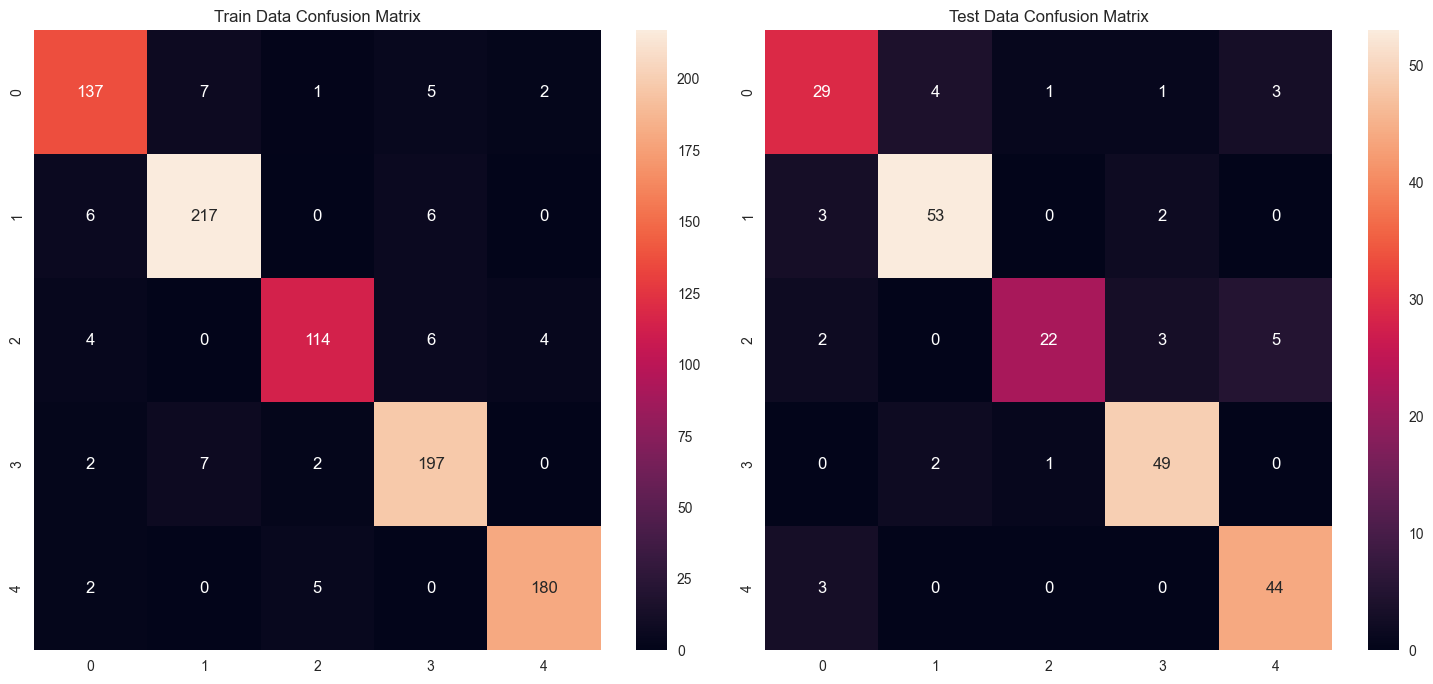

In [44]:
# KNN model evaluation
check_metrics(knn, X_train_clean, y_train, X_test_clean, y_test)

DecisionTreeClassifier Accuracy Score:
Train : 100.00% | Test : 82.82%
DecisionTreeClassifier Macro Precision Score:
Train : 1.00 | Test : 0.82
DecisionTreeClassifier Macro Recall Score:
Train : 1.00 | Test : 0.82
DecisionTreeClassifier Macro F1 Score:
Train : 1.00 | Test : 0.82
DecisionTreeClassifier Confusion Matrix:


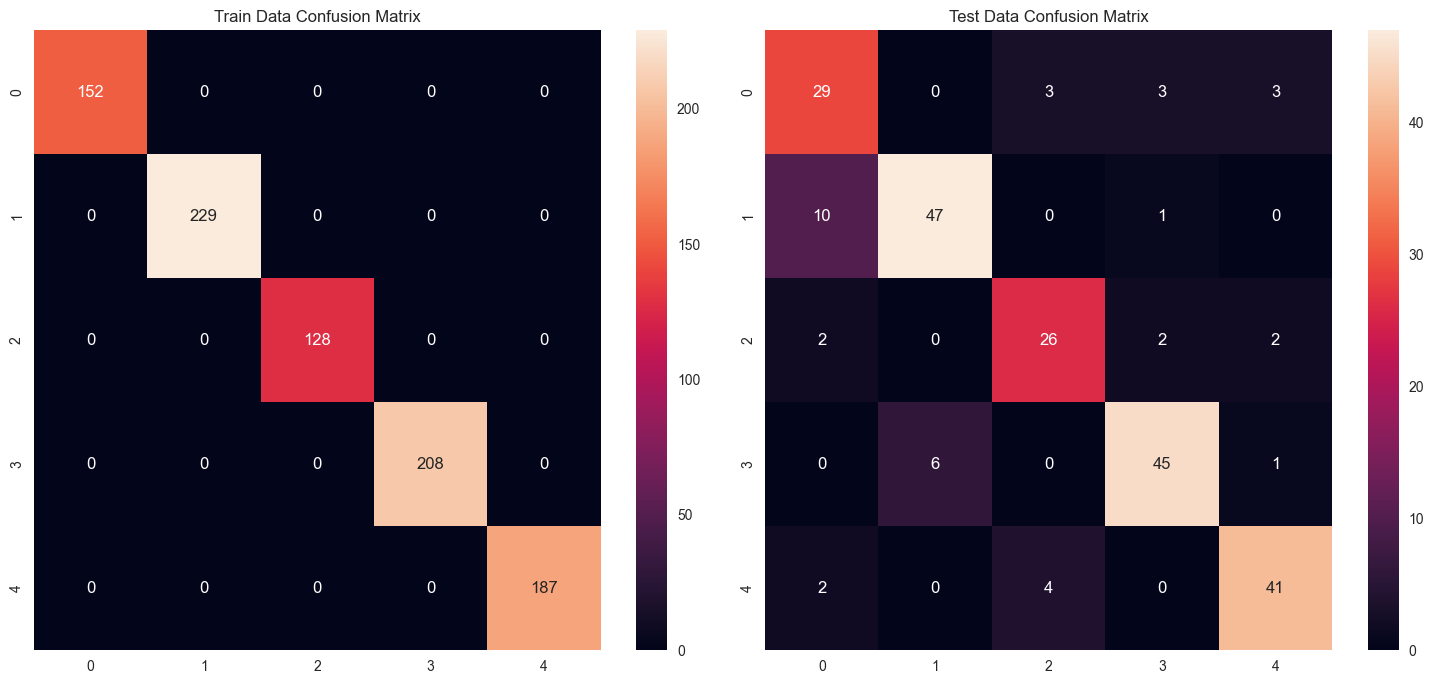

In [45]:
# Decision Tree model evaluation
check_metrics(dt, X_train_clean, y_train, X_test_clean, y_test)

In [46]:
user_input = pd.DataFrame({
    'Vehicle Model': ['Chevy Bolt'],  # Original vehicle model name
    'Battery Capacity (kWh)': [75.0],
    'Charging Station Location': ['Houston'],  # Original location name
    'Energy Consumed (kWh)': [40.0],
    'Charging Duration (hours)': [2.0],
    'Charging Rate (kW)': [30.0],
    'Charging Cost (USD)': [25.0],
    'Time of Day': ['Evening'],  # Original time of day
    'Day of Week': ['Wednesday'],  # Original day name
    'State of Charge (Start %)': [50.0],
    'State of Charge (End %)': [80.0],
    'Distance Driven (since last charge) (km)': [150.0],
    'Temperature (°C)': [20.0],
    'Vehicle Age (years)': [2.0],
    'Charger Type': ['Level 1'],  # Original charger type
    'User Type': ['Commuter']  # Original user type
})

# Create a copy for encoding
user_input_encoded = user_input.copy()

# Encode categorical features using LabelEncoder
for col in object_df:
    le = LabelEncoder()
    # Fit on training data
    le.fit(df[col])
    # Transform user input
    user_input_encoded[col] = le.transform(user_input[col])

# Scale the numerical features
numeric_features = user_input_encoded[numeric_df].values
scaled_numeric = scaler.transform(numeric_features)
user_input_scaled = user_input.copy()
for i, col in enumerate(numeric_df):
    user_input_scaled[col] = scaled_numeric[0][i]

# Make predictions with encoded and scaled data
knn_pred = knn.predict(user_input_encoded)
dt_pred = dt.predict(user_input_encoded)

print("\nInput Data (Before Encoding):")
print(user_input)

print("\nInput Data (After Encoding and Scaling):")
print(user_input_encoded)

print("\nPrediction Results:\n")
print(f"KNN Model predicts Cluster: {knn_pred[0]}")
print(f"Decision Tree Model predicts Cluster: {dt_pred[0]}")

# Define cluster characteristics
cluster_profiles = {
    0: "High-Capacity Long-Distance User",
    1: "Efficient Regular User",
    2: "Short-Range Urban User",
    3: "Premium Fast-Charging User",
    4: "Economy User"
}

# Print interpretation
print("\nInterpretation:\n")
print(f"Based on KNN model, this EV usage pattern matches: {cluster_profiles[knn_pred[0]]}")
print(f"Based on Decision Tree model, this EV usage pattern matches: {cluster_profiles[dt_pred[0]]}")

# Print characteristics based on majority prediction
majority_cluster = knn_pred[0] if knn_pred[0] == dt_pred[0] else knn_pred[0]
print("\nCharacteristics of this usage pattern:")

if majority_cluster == 0:
    print("- Highest battery capacity user")
    print("- Tends to drive long distances between charges")
    print("- High energy consumption pattern")
    print("- Uses moderate to high charging rates")
elif majority_cluster == 1:
    print("- Medium battery capacity user")
    print("- Drives moderate distances")
    print("- Shows efficient energy consumption")
    print("- Uses standard charging rates")
elif majority_cluster == 2:
    print("- Lower battery capacity user")
    print("- Drives shorter distances")
    print("- Shows lower energy consumption")
    print("- Prefers quick charging sessions")
elif majority_cluster == 3:
    print("- High battery capacity user")
    print("- Drives medium to long distances")
    print("- Uses high charging rates")
    print("- Maintains higher end state of charge")
else:  # cluster 4
    print("- Lowest battery capacity user")
    print("- Drives shortest distances")
    print("- Shows minimal energy consumption")
    print("- Uses lower charging rates")



Input Data (Before Encoding):
  Vehicle Model  Battery Capacity (kWh) Charging Station Location  \
0    Chevy Bolt                    75.0                   Houston   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0                   40.0                        2.0                30.0   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0                 25.0     Evening   Wednesday                       50.0   

   State of Charge (End %)  Distance Driven (since last charge) (km)  \
0                     80.0                                     150.0   

   Temperature (°C)  Vehicle Age (years) Charger Type User Type  
0              20.0                  2.0      Level 1  Commuter  

Input Data (After Encoding and Scaling):
   Vehicle Model  Battery Capacity (kWh)  Charging Station Location  \
0              1                    75.0                          1   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging 

In [47]:
import pickle

# Save the model to a file
with open('ship_performance_dt_model.pkl', 'wb') as f:
    pickle.dump(dt, f)